# INFO 204 Practical Test 2 Practice Test

This notebook provides some expectation towards the types of questions that you may encounter in the practical test - it is not an exact copy of the style of questions that you will be asked in the practical test, but should provide an overview of where you should focus your revision.

The practice test has three sections:
1. Fitting, interpreting, and optimising k-means clustering
2. Supervised learning on text
3. Short answer questions

Rather than repeat the text here, some sections in this document will ask you to revisit exercises in previous labs. <span style='color: #ce2227'>___YOU ARE STRONGLY ADVISED TO COMPLETE LABS 8 AND 10 AS REVISION FOR THIS TEST___</span>

In the test, we will load all the libraries for you, much like we do here:

In [1]:
%env OMP_NUM_THREADS=1
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from pandas.plotting import parallel_coordinates

from sklearn.metrics import silhouette_score, confusion_matrix, classification_report, f1_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_wine

env: OMP_NUM_THREADS=1


In the test, YOU WILL NOT NEED TO (NOR SHOULD YOU) LOAD ADDITIONAL LIBRARIES

## Part 1: Clustering

The following questions work with the following data:

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618   -2.336348    2.366517         -19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000   -5.800000    1.360000         -30.000000   70.000000   
25%     12.362500   -3.082500    2.210000         -21.500000   88.000000   
50%     13.050000   -1.865000    2.360000         -19.500000   98.000000   
75%     13.677500   -1.602500    2.557500         -17.200000  107.000000   
max     14.830000   -0.740000    3.230000         -10.600000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270             -0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000             -0.660000         0.410000   
25%         1.742500    1.205000             -0.437500         1.250000   
50%         2.355000    2.135000             -0.340000         1.555000   
75%         2.800000    2.875000             -0.270000         1.950000   
max         3.880000    5.080000             -0.130000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean         -5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min         -13.000000    0.480000                      1.270000   278.000000  
25%          -6.200000    0.782500                      1.937500   500.500000  
50%          -4.690000    0.965000                      2.780000   673.500000  
75%          -3.220000    1.120000                      3.170000   985.000000  
max          -1.280000    1.710000                      4.000000  1680.000000

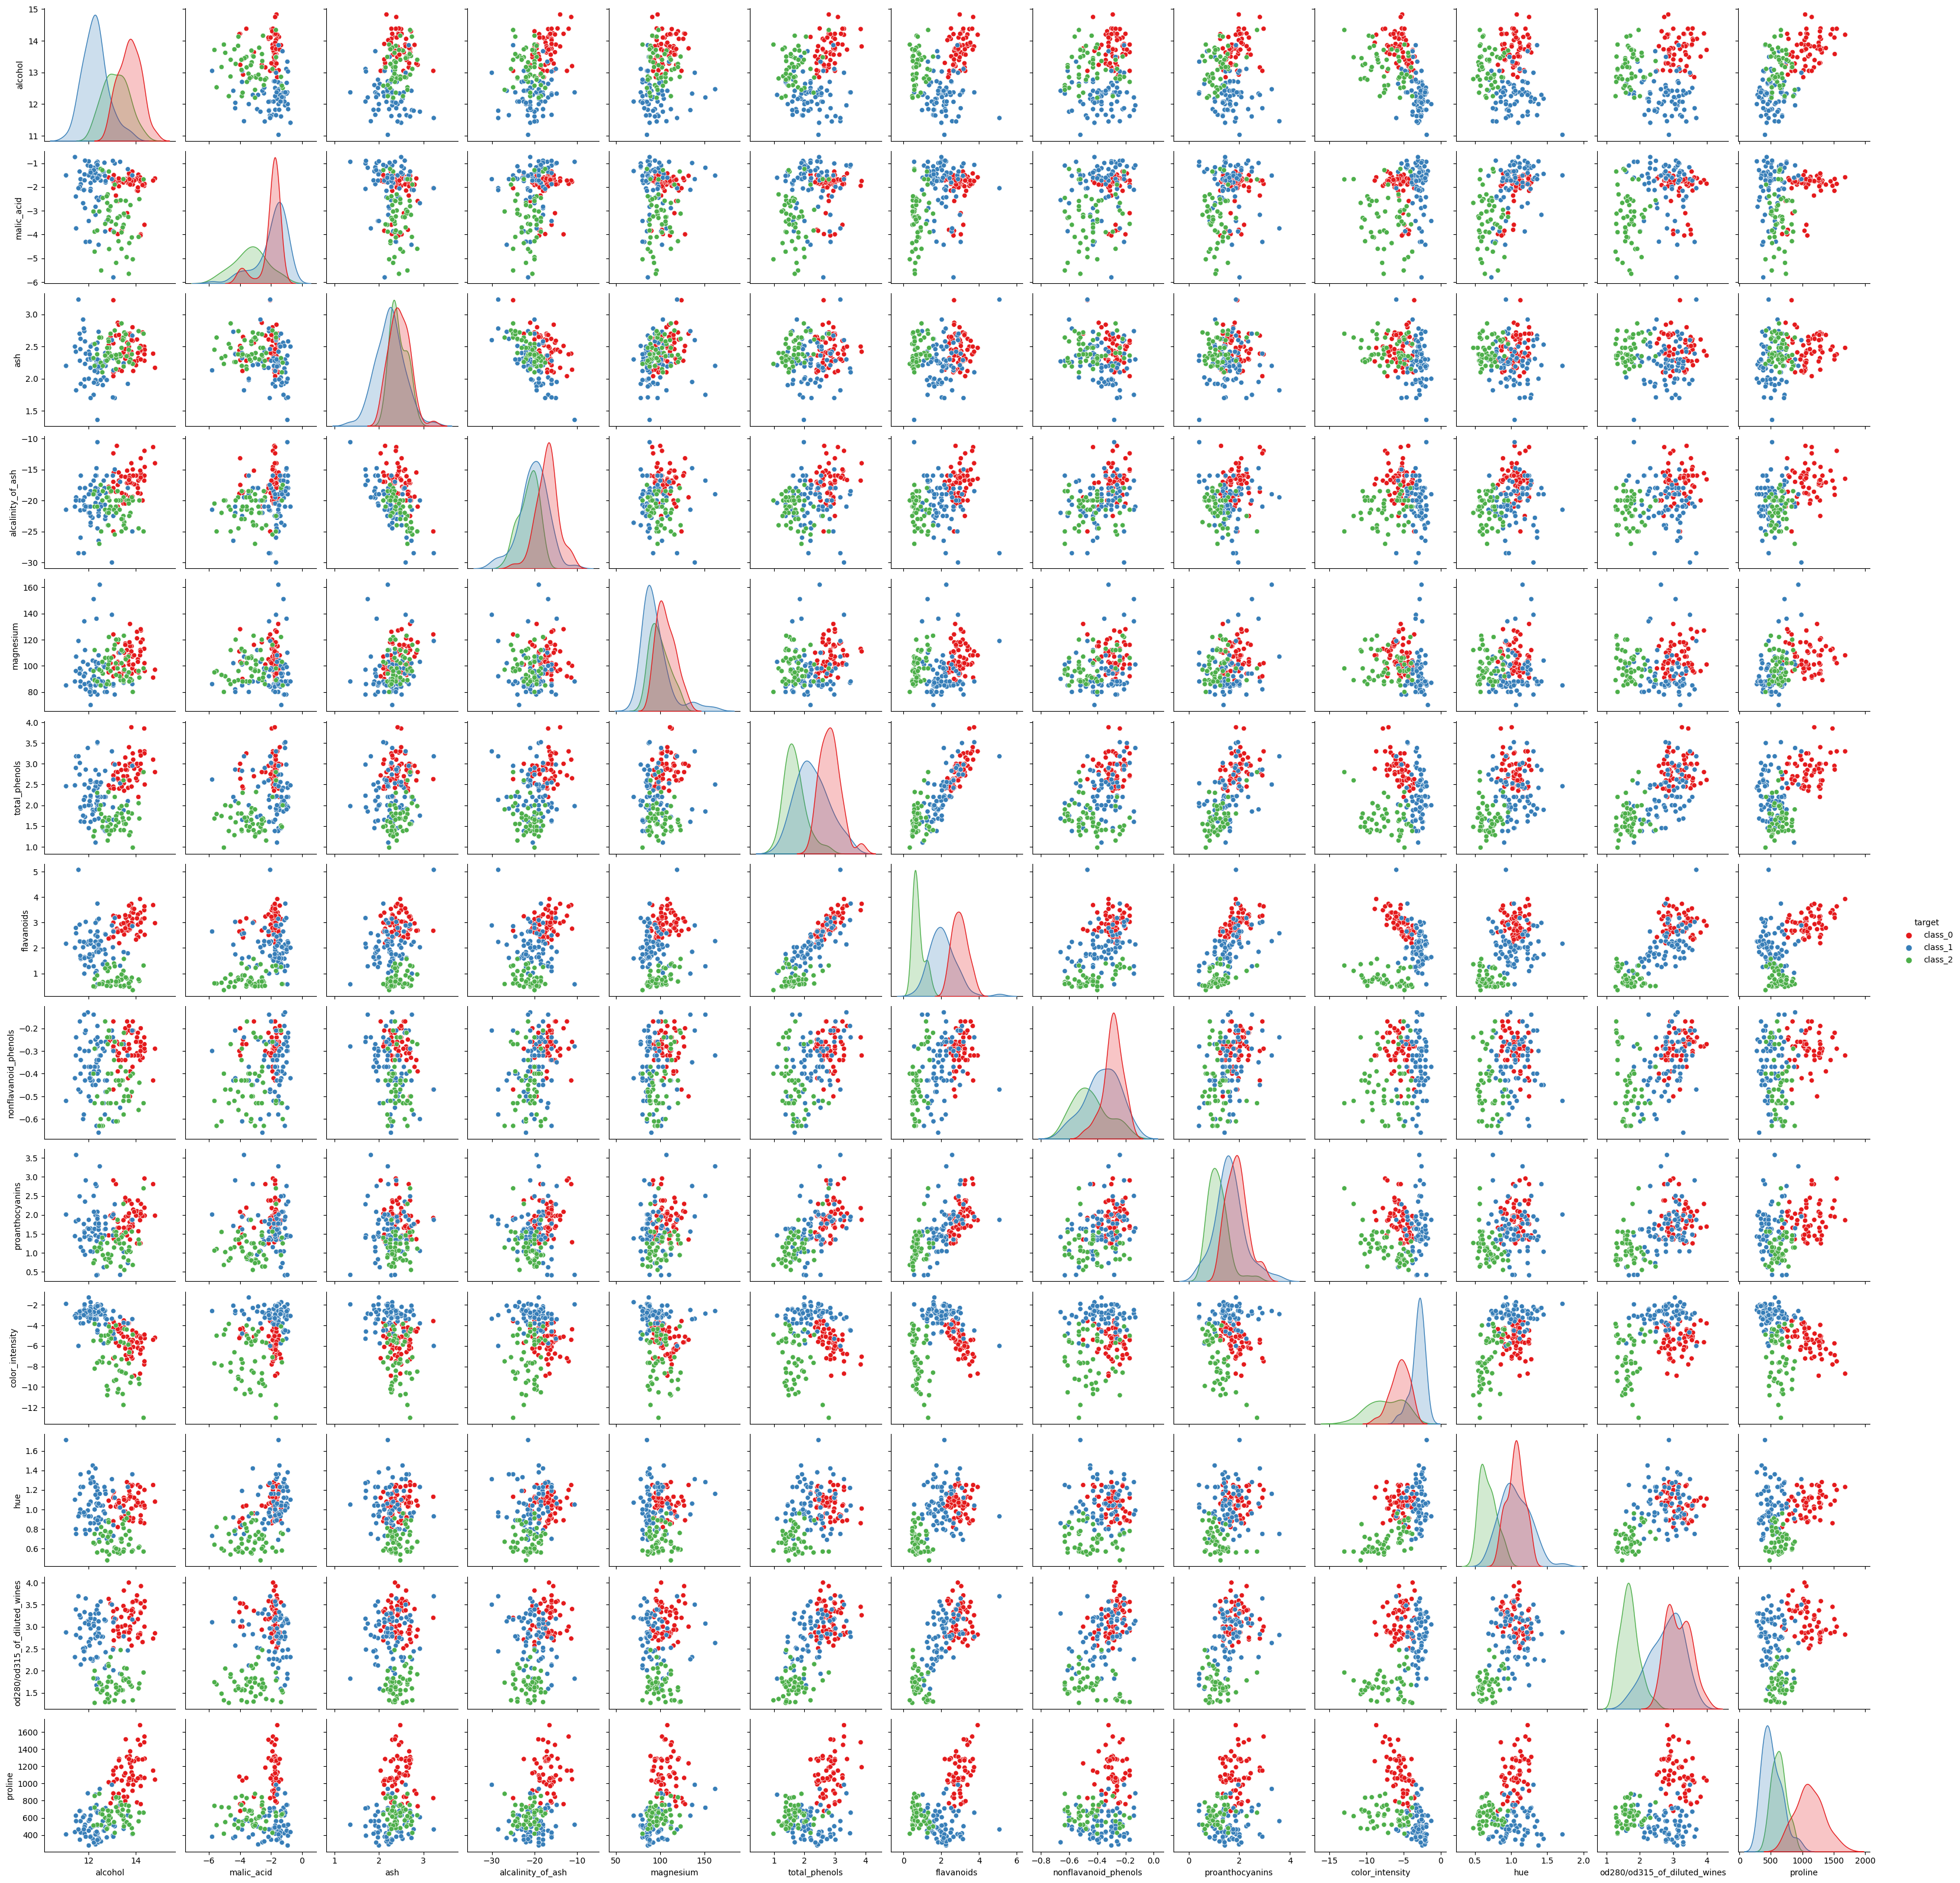

In [2]:
wine = load_wine()
X, t = wine['data'], wine['target']
for c in [  1, 3, 7, 9 ]:
    X[:, c] = -X[:, c]

feature_names = wine['feature_names']

all_data = pd.DataFrame(X, columns=feature_names)
all_data['target'] = wine['target_names'][t]

display(all_data.describe())

sns.pairplot(all_data, hue='target', palette='Set1')
plt.show()

### <span style='color: #ce2227'>TASK 1:</span> Perform a silhouette analysis of k-means clustering on this data set. Consider between 2 and 10 clusters. Produce a plot that compares the number of clusters on the x axis against the silhouette score in the y axis. As part of your analysis, return a variable called `best_clusters` that identifies the number of clusters that produces the best silhouette score. MAKE SURE TO STANDARDISE VARIABLES IF YOU THINK IT'S IMPORTANT.

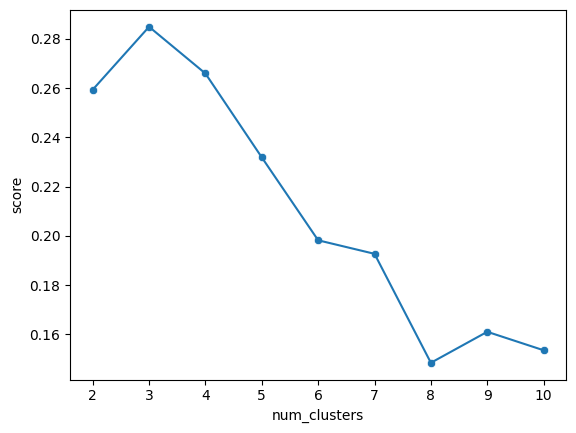

   num_clusters     score
8            10  0.153552


In [25]:
perf = []
scaler = StandardScaler();
X_scale = scaler.fit_transform(X)

for n_cluster in [ 2, 3, 4, 5, 6, 7, 8, 9, 10 ]:
    km = KMeans(n_clusters=n_cluster, random_state=1234).fit(X_scale)
    perf.append({ 'num_clusters' : n_cluster, 'score' : silhouette_score(X_scale, km.labels_) })
perf = pd.DataFrame(perf)
best_k = perf[perf['num_clusters']==perf['num_clusters'].max()]
sns.lineplot(data=perf, x='num_clusters', y='score')
sns.scatterplot(data=perf, x='num_clusters', y='score')
plt.show()
print(best_k)

### <span style='color: #ce2227'>TASK 2:</span> Using the `best_clusters` identified in the previous task, perform k-means clustering on this data set and extract the cluster centroid into a data frame. Add a `cluster` column to the data frame that indicates a unique identifer for each row (i.e., each cluster centroid). Use this data frame to produce a parallel coordinates plot of these centroids, coloured by the cluster label. Then briefly describe the the nature of the cluster centers (e.g., features that tend to produce good cluster separation)

In [ ]:
### WRITE YOUR CODE HERE

___WRITE YOUR ANSWER HERE___

## Part 2: Supervised Learning with Text

Here, you will revisit the SPAM classification problem from Lab 10. Load the data in and split the data into 70% training and 30% testing.


In [ ]:
### WRITE YOUR CODE HERE (IN THE TEST THIS WILL BE PROVIDED)

We'll also make use of this function to more easily plot the results of cross validation:

In [ ]:
def extract_cv_results(cv, tfidf_name='tfidf', dimred_name='dimred'):
    results = pd.DataFrame(cv.cv_results_)

    tfidf_columns = results.columns[results.columns.str.match(f'param_{tfidf_name}')]
    dimred_columns = results.columns[results.columns.str.match(f'param_{dimred_name}__n_components')]
    id_vars = np.concatenate([ tfidf_columns, dimred_columns ])

    score_columns = results.columns[results.columns.str.match('split.+_test_score')]

    results = results.melt(id_vars=id_vars, value_vars=score_columns, value_name='score')
    results.columns = results.columns.str.removeprefix('param_')
    results.columns = results.columns.str.removeprefix(f'{dimred_name}__')

    return results

### <span style='color: #ce2227'>TASK 3:</span> Construct a Pipeline that contains two steps - a step called `'bow'` that uses a `CountVectorizer` to convert text into a bag of words representation, and a second step that uses a `LogisticRegression` to perform classification. Using `cross_val_score`, along with the required resources (e.g., `KFold` to determine the number of cross valiation folds, and a suitable scorer that takes into account the underlying class distribution), determine the mean cross validation performance performance of this pipline on the training data:

In [ ]:
### WRITE YOUR CODE HERE

### <span style='color: #ce2227'>TASK 4:</span> Extend the pipeline from the previous task such that it includes a step for feature extracttion via TF-IDF, and then a dimension reduction using a `TruncatedSVD`. Name these new steps `'tfidf'` and `'dimred'`. This pipeline will need tuning, so create a tuning grid that examines: whether or not to use a `TfIdfTransformer` in the `'tfidf'` step; and the number of components `n_components` within a `TruncatedSVD` operation sitting within the `dimred` step (explore the number of components [1, 3, 7, 15, 31, 62, 125, 250, 500]). Finally, use `GridSearchCV` object to tune and fit a model against our training data.

In [ ]:
### WRITE YOUR CODE HERE

### <span style='color: #ce2227'>TASK 5:</span> Use the provided `extract_cv_results` function to produce a data frame from the cross validation results in the previous step. Use this data frame to produce a line plot that plots the number of components used in the x axis against mean cross validation score in the y axis. Colour this plot according to whether or not TF-IDF was used or not. Finally, add a horizontal line to this plot that shows the performance of the pipeline from Task 3

In [ ]:
### WRITE YOUR CODE HERE

### <span style='color: #ce2227'>TASK 6:</span> Extract the best estimator pipeline identified by cross validation in Task 4. From this pipeline, extract the `CountVectorizer` used at the `'bow'` step, and the `TruncatedSVD` object used at the `'dimred'` step. Use the `explained_variance_ratio_` array of the pipeline's `TruncatedSVD` object to explain the amount of feature variance captured by this model, and print the length of the vocabulary of the pipeline's `CountVectorizer` object. Finally, obtain the test predictions of the best estimator, and use these predictions within a `classification_report` and `confusion_matrix` call.

In [ ]:
### WRITE YOUR CODE HERE

### <span style='color: #ce2227'>TASK 7:</span> Comment on the performance variation between using TF-IDF and not, along with the number of components used by the pipeline in Tasks 4-6, relative to the performance of the pipeline used in Task 3.

___WRITE YOUR ANSWER HERE___

## Part 3: Short Answer Questions:

Topics that may be explored in this section will come from Lectures 15-17, 19, and 21-22, such as:
1. TF-IDF, how it works, and its main goal (Lecture 21)
2. The purpose of word embeddings against a bag of words-like representation (Lecture 22)
3. Bias and variance in supervised learning, and their relationship to bagging and boosting (Lecture 19)
4. When should (or shouldn't) standardisation be used in unsupervised learning, such as k-means clustering or PCA
5. What are principal components? Why might it be possible to reduce the number of dimensions of a problem using PCA and not reduce classification or regression performance?
6. What is the relationship between PCA as used in the eigenfaces problem, and the layers of a convolutional neural network? (thinking back to Lecture 13 and Lab 7 for this may help)

Don't forget to check the tutorials related to these lectures for information that may help with answering these questions.